In [1]:
# Figure S2

In [2]:
import glob
import warnings

import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import gcgridobj
from gcpy import single_panel 
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import regionmask 
import xarray as xr 

from src import tools

warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
months = [6,6,6]
daily_mda8o3_ar6_ena = tools.get_observed_daily_mda8o3_ar6("ENA", months[0], criteria=90)
daily_mda8o3_ar6_wce = tools.get_observed_daily_mda8o3_ar6("WCE", months[1], criteria=90)
daily_mda8o3_ar6_eas = tools.get_observed_daily_mda8o3_ar6("EAS", months[2], criteria=90)

In [4]:
months = [8, 8, 8]
daily_mda8o3_ar6_ena2 = tools.get_observed_daily_mda8o3_ar6("ENA", months[0], criteria=90)
daily_mda8o3_ar6_wce2 = tools.get_observed_daily_mda8o3_ar6("WCE", months[1], criteria=90)
daily_mda8o3_ar6_eas2 = tools.get_observed_daily_mda8o3_ar6("EAS", months[2], criteria=90)

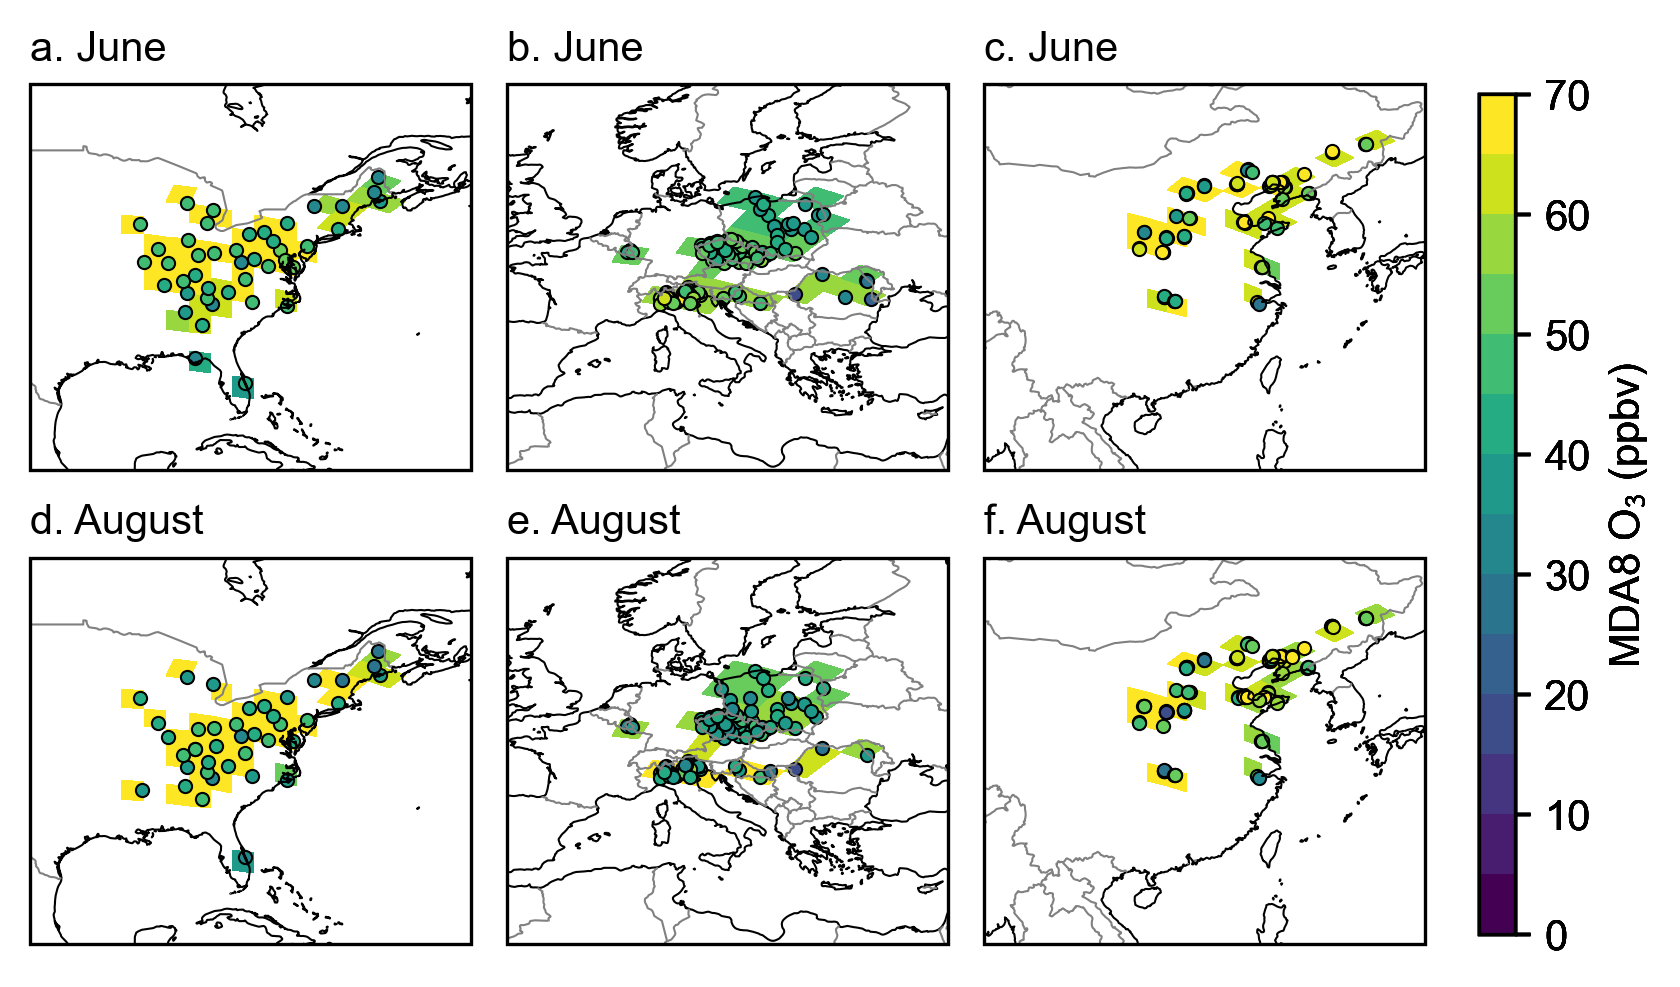

In [5]:
tools.set_matplotlib_font("Arial")
fig, ax = plt.subplots(
    dpi=300, 
    figsize=(6, 4), 
    sharex=False, sharey=False,
    nrows=2, ncols=3,
    constrained_layout=True,
    subplot_kw={"projection": ccrs.PlateCarree()}
)
ax = ax.flatten()
titles= ["a. June", "b. June", "c. June", "d. August", "e. August", "f. August"]
extents = [
    (-100, -60, 20, 55), (-5, 35, 30, 65), (95, 135, 15, 50),
    (-100, -60, 20, 55), (-5, 35, 30, 65), (95, 135, 15, 50)
]
cmap = plt.cm.get_cmap('viridis', 14)    # 11 discrete color
bounds = np.linspace(0, 70, 15)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

ds_ref = xr.open_dataset(fr"/home/eleroy/proj-dirs/OZCLIM/data/analysis_data/GCHP_CAM_public/GCHP.all_ref_c48.MDA8_O3.april-august.nc4")
ds_ref = ds_ref*1e9

months = [6,6,6,8,8,8]

for idx, data in enumerate([daily_mda8o3_ar6_ena, daily_mda8o3_ar6_wce, daily_mda8o3_ar6_eas,
                            daily_mda8o3_ar6_ena2, daily_mda8o3_ar6_wce2, daily_mda8o3_ar6_eas2]):
    sitemean_mda8o3_ar6 = data.groupby("SITE_ID").mean()
    observation_mask = tools.get_observation_mask(sitemean_mda8o3_ar6)
    da_ref = tools.get_masked_model_mda8o3(ds_ref, observation_mask, months[idx])
    da_ref_mean = da_ref.mean(dim=['sim', 'time'])
    plot = single_panel(plot_vals=da_ref_mean, 
                ax=ax[idx], gridtype="cs", 
                comap=cmap,
                norm=norm,
                extent=extents[idx], 
                vmin=0, vmax=70,
                unit="ppbv",
                title=None,
                add_cb=False)

    country_borders = cfeature.NaturalEarthFeature(
            category="cultural",
            name="admin_0_boundary_lines_land",
            scale="50m",
            facecolor="none",
        )

    # Plot each site location on the map
    for index, row in sitemean_mda8o3_ar6.iterrows():
        ax[idx].scatter(row['Longitude'], row['Latitude'], c=row['O3_mda8'], cmap=cmap, edgecolor='black', linewidth=0.5, norm=norm, s=10, transform=ccrs.PlateCarree())


    ax[idx].add_feature(cfeature.COASTLINE, edgecolor="black", linewidth=0.5)
    ax[idx].add_feature(country_borders, edgecolor="gray", linewidth=0.5)
    ax[idx].spines[['right', 'top']].set_visible(False)

    ax[idx].set_title(titles[idx], loc="left", fontsize=10)
    fig.tight_layout()
    fig.subplots_adjust(right=0.80)
    cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
    fig.colorbar(plot, cax=cbar_ax, label="MDA8 O$_3$ (ppbv)", orientation="vertical", pad=0.05, fraction=0.05, shrink=0.65)


#########################################
plt.savefig("FigS2_new.png")
